### Fitting linear regression model

[0.14383955]
[0.17484951]


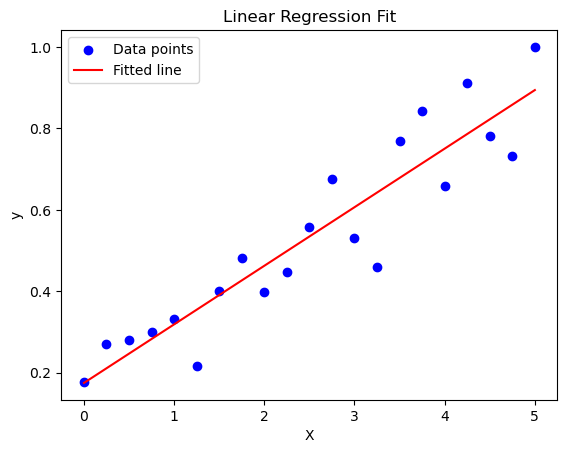

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt

# Load the data
x = pd.read_csv('Week3Data/wk3_exampleDataLinear.csv', header=None, usecols=[0])
y = pd.read_csv('Week3Data/wk3_exampleDataLinear.csv', header=None, usecols=[1])


# Create and fit the linear regression model
model = LinearRegression()
model.fit(x,y)

# Get the model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Print the linear equation
print(slope)
print(intercept)



# # Plot the data and the fitted line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

### Non linear model fit

[0.00634218 0.11212865 0.19995397]


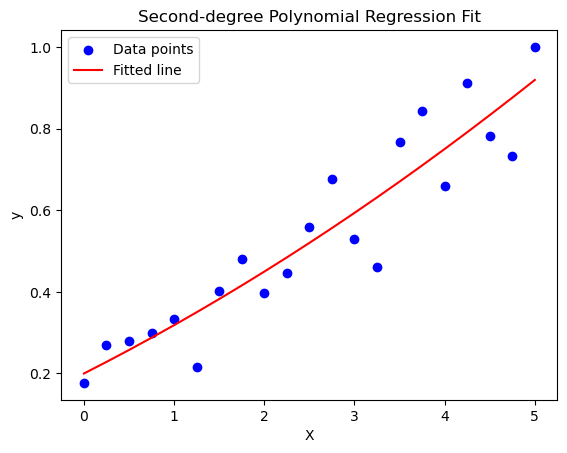

In [2]:
# Fit the polynomial regression model using numpy
coefficients = np.polyfit(x.squeeze(), y.squeeze(), deg=2)
poly = np.poly1d(coefficients)

# Predict using the polynomial model
y_pred = poly(x)

# Get the model parameters
print(coefficients)

# # Plot the data and the fitted line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Second-degree Polynomial Regression Fit')
plt.show()

### Model fitting with data from practical activity

0    4017.6
1    3852.7
2    3022.5
3    2238.0
4    1628.4
dtype: float64


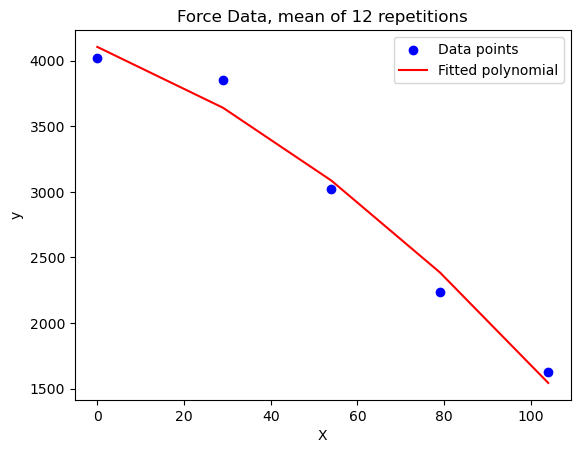

In [3]:
# Load the data
x = pd.read_csv('Week3Data/wk3_exampleDataPrac.csv', header=None, usecols=[0])
y = pd.read_csv('Week3Data/wk3_exampleDataPrac.csv', header=None, usecols=[*range(1,11)])

#find the mean of the data in y
y_mean = y.mean(axis=1)
print(y_mean)

# Fit the polynomial regression model using numpy
coefficients = np.polyfit(x.squeeze(), y_mean.squeeze(), deg=2)
poly = np.poly1d(coefficients)

# Predict using the polynomial model
y_pred = poly(x)


# # # Plot the data and the fitted line
plt.scatter(x, y_mean, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Fitted polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Force Data, mean of 12 repetitions')
plt.show()

### Sensor characteristics

Full scale input range: 104
Full scale output range: 1.2301075601903966
Linearity error (%): 5.504459308807121
Repeatability (%): 86.11596085583105
Sensitivity: [-0.0013793103448275835, 0.0027999999999999982, -0.0019999999999999974, 0.001599999999999997]


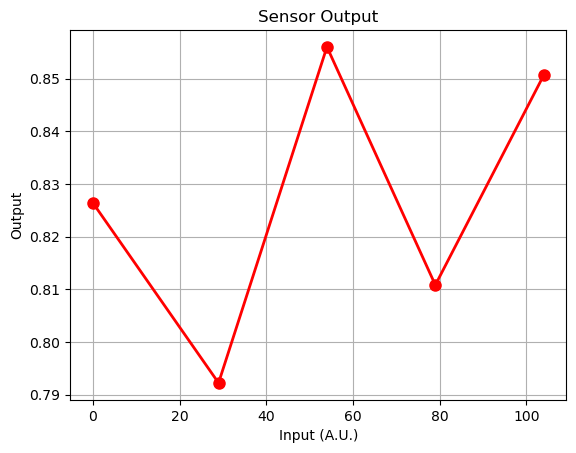

In [25]:
from scipy.stats import norm 

# Use a CDF as the base model for output
output_up = norm.cdf(x, loc=1, scale=0.5)
outMat_up = output_up + 0.1 * np.random.randn(5, len(x))  # jitter for 5 repetitions
outMat_up[outMat_up < 0] = 0  # set floor to zero

# Visualise the data
mean_out = np.mean(outMat_up, axis=0)
plt.plot(x, mean_out, 'o-r', linewidth=2, markersize=8, markerfacecolor='r')
plt.xlabel('Input (A.U.)')
plt.ylabel('Output')
plt.title('Sensor Output')

# Full scale input range
FS = x[0][4] - x[0][0]
print("Full scale input range:", FS)

# Full scale output range
FS_out = np.max(outMat_up) - np.min(outMat_up)
print("Full scale output range:", FS_out)

# Nonlinearity
mean_up = np.round(mean_out * 100) / 100
deltaY_up = mean_up[-1] - mean_up[0]
deltaX = FS
m = deltaY_up / deltaX
b = mean_up[0]

lineOut_up = m * x + b
maxdeviation_up = np.max(np.abs(lineOut_up[0] - mean_up))
linearityError = maxdeviation_up / np.mean(mean_up) * 100
print("Linearity error (%):", linearityError)

# Repeatability
diffs = np.ptp(outMat_up, axis=0) / FS_out * 100
repeatability = np.mean(diffs)
print("Repeatability (%):", repeatability)

# Sensitivity
sensitivity = []
for i1 in range(len(x) - 1):
    delta_out = mean_up[i1] - mean_up[i1 + 1]
    delta_in = x[0][i1] - x[0][i1 + 1]
    sensitivity.append(delta_out / delta_in)
print("Sensitivity:", sensitivity)

plt.grid(True)
plt.show()